# CREDIT- G PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
%matplotlib inline

In [2]:
cred = pd.read_csv('credit-g.csv')

In [15]:
cred.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


# Question 1: Determine the percentage of Foreign workers

# There is a total percentage of 96.3% foreign workers while the remaining 3.7% are not foreign workers

In [16]:
percent = round(100*cred['foreign_worker'].value_counts()/len(cred['foreign_worker']),2)

In [28]:
percent

yes    96.3
no      3.7
Name: foreign_worker, dtype: float64

# Question 2: Determine the highest employment years

In [30]:
cred['employment'].value_counts()

'1<=X<4'      339
'>=7'         253
'4<=X<7'      174
'<1'          172
unemployed     62
Name: employment, dtype: int64

# Question 3: plot a heatmap of the dataset correlation

<AxesSubplot:>

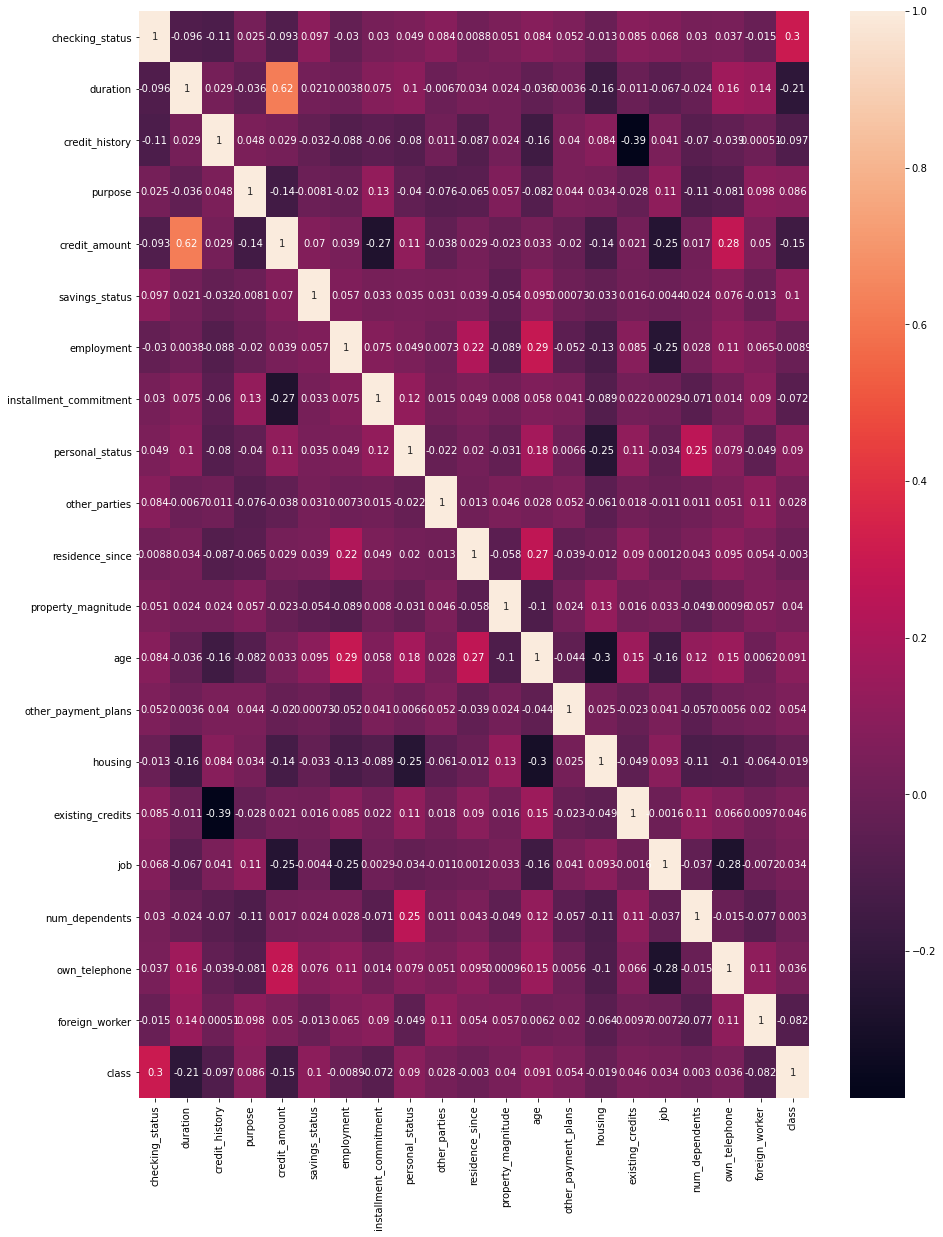

In [38]:
fig = plt.figure(figsize=(15,20))
sns.heatmap(credit.corr(), annot = True)

# Question 4: build a machine learning algorithm using any of the classifier and the score should be from 0.78 above

<AxesSubplot:>

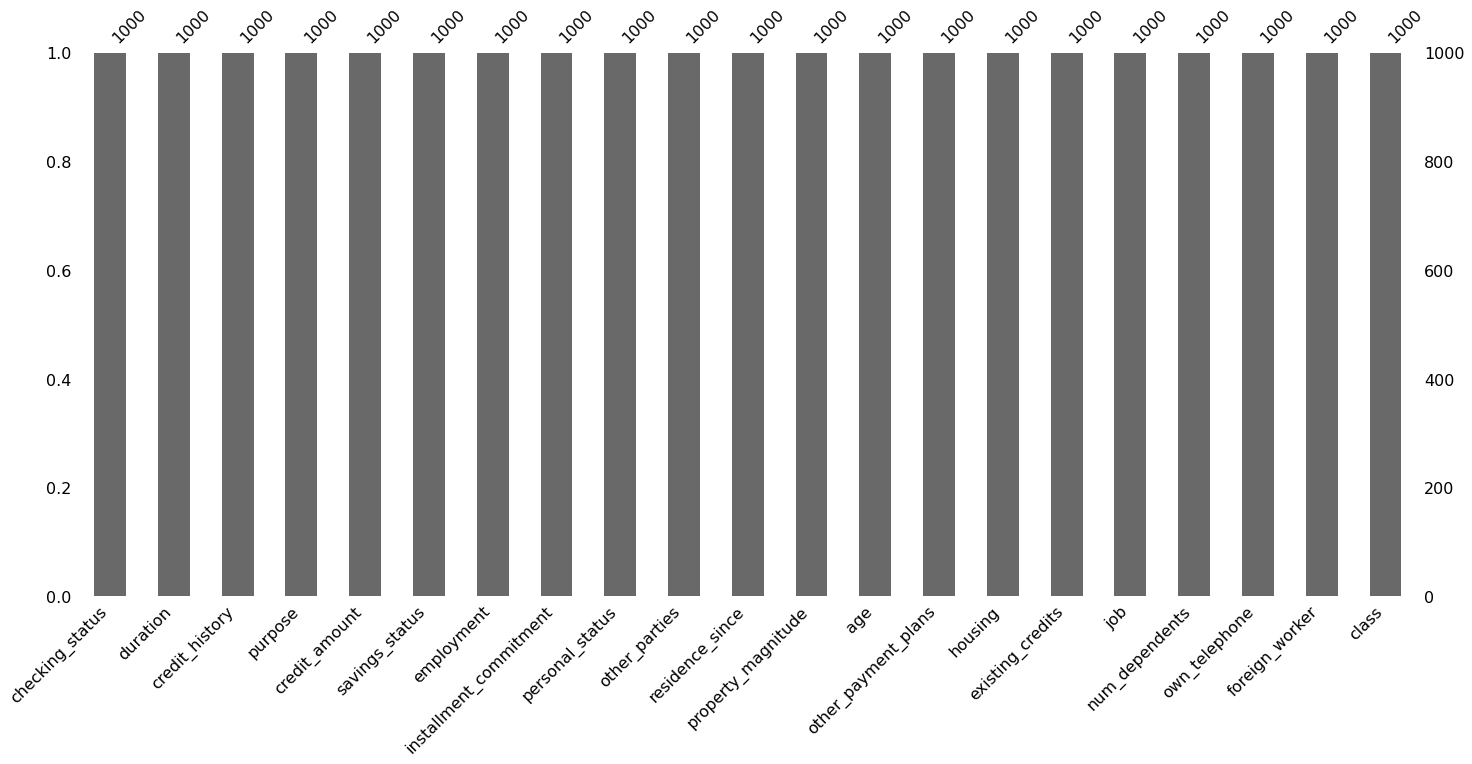

In [58]:
mns.bar(cred)

In [59]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer()
x = vectorize.fit_transform(cred.credit_history)
vocab = vectorize.get_feature_names()

In [60]:
y = cred.existing_credits

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [62]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [63]:
bnb.score(x_test,y_test)

0.79

In [64]:
pred = bnb.predict(x_test)

In [65]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [66]:
pred2 = lg.predict(x_test)

In [67]:
lg.score(x_test,y_test)

0.7966666666666666

In [68]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
forest.score(x_test,y_test)

0.7966666666666666

In [72]:
pred3 = forest.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[156  31   0   0]
 [ 20  81   0   0]
 [  2   8   0   0]
 [  1   1   0   0]]


              precision    recall  f1-score   support

           1       0.87      0.83      0.85       187
           2       0.67      0.80      0.73       101
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2

    accuracy                           0.79       300
   macro avg       0.39      0.41      0.40       300
weighted avg       0.77      0.79      0.78       300



C:\Users\OLAMIDE FATOSIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
